# Bank marketing campaigns segment analytic


---

## Preliminary Wrangling

> We will be analyzing [Bank marketing campaigns dataset](https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset#bank-additional-full.csv) which is publicly available on Kaggle. This dataset describes Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If the client says yes to opening the term deposit account, the target variable `'y'` is marked as 'yes', else 'no'.

We have following fields available in the dataset:
 - _age_ : age (numeric)
 - _job_ : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
 - _marital_ : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
 - _education_ : educated upto (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
 - _default_ : has credit in default? (categorical: "no","yes","unknown")
 - _housing_ : has housing loan? (categorical: "no","yes","unknown")
 - _loan_ : has personal loan? (categorical: "no","yes","unknown")
 - _contact_ : contact communication type (categorical: "cellular","telephone")
 - _month_ : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 - *day_of_week* : last contact day of the week (categorical: "mon","tue","wed","thu","fri")
 - _duration_ : last contact duration, in seconds (numeric). 
 - _campaign_ : number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - _pdays_ : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - _previous_ : number of contacts performed before this campaign and for this client (numeric)
 - _poutcome_ : outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 - _emp.var.rate_ : employment variation rate - quarterly indicator (numeric)
 - _cons.price.idx_ : consumer price index - monthly indicator (numeric)
 - _cons.conf.idx_ : consumer confidence index - monthly indicator (numeric)
 - _euribor3m_ : euribor 3 month rate - daily indicator (numeric)
 - _nr.employed_ : number of employees - quarterly indicator (numeric) - I assume these are the number of employees working for the bank at the time of the call.
 - _y_ : has the client subscribed a term deposit? (binary: "yes","no")


Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [46]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

%matplotlib inline

### Load Data

In [47]:
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/MyDrive/datasets/bank-additional-full.csv', sep = ';')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's change the column name of some variables.

In [48]:
# Change column names for ease of use

data.rename(columns = {'emp.var.rate' : 'EVR', 'cons.price.idx' : 'CPI', 
                       'cons.conf.idx' : 'CCI', 'euribor3m' : 'euribor',
                       'nr.employed' : 'no_emp'}, inplace = True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     41188 non-null  int64  
 11  campaign     41188 non-null  int64  
 12  pdays        41188 non-null  int64  
 13  previous     41188 non-null  int64  
 14  poutcome     41188 non-null  object 
 15  EVR          41188 non-null  float64
 16  CPI          41188 non-null  float64
 17  CCI          41188 non-null  float64
 18  euribor      41188 non-null  float64
 19  no_e

In [50]:
data.duplicated().any()

True

In [51]:
data[data.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,EVR,CPI,CCI,euribor,no_emp,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Some of the duplicate rows are consecutive and the rest are largely nearby in the dataset. Therefore, this doesn't seem like the case of some customers randomly having similar details. It looks like the data duplication happened while entering the data.

Let's remove these duplicate rows.

In [52]:
data.drop_duplicates(inplace = True)

data.shape

(41176, 21)

In [53]:
# Removing 'unknown' values

df = data.copy()
for col in df.columns:
    df = df.loc[~(data[col] == 'unknown')]

df.shape

(30478, 21)

Our target variable `'y'` is categorical variable with the values of 'yes' and 'no'. It could be useful if we can add one more column where we record the same result in binary 0 and 1.

In [54]:
# New column name will be 'y_n' where n denotes numeric.
data.loc[data['y'] == 'yes', 'y_n'] = 1
data.loc[data['y'] == 'no', 'y_n'] = 0

In [55]:
data.describe()

,age,duration,campaign,pdays,previous,EVR,CPI,CCI,euribor,no_emp,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### What is the structure of your dataset?

> There are 21 columns and 41176 rows in the dataset. Some of the variables in the dataset has values as 'unknown'. As removing these values could reduce our dataset size and impact our analysis, we will choose to keep the values as is.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is column `'y'` since this records the result whether the client agreed to opening the term deposit.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We would want to analyze factors such as age, job, education, marital status, call duration, number of contacts made in the campaign, the results of previous campaign outcome. We will also see explore the impact of financial variables such as employment variation rate, consumer price index, consumer confidence index and euribor 3 month rate.

## Univariate Exploration


Let's begin by checking what percentage of bank clients agree to open term deposit.

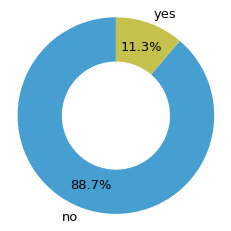

In [56]:
ratio = data.y.value_counts()

plt.figure(figsize = (4,4))
plt.pie(ratio, labels = ratio.index, autopct='%1.1f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 13})
plt.axis('square');

> Out of the total calls that are made, 11.3 % of them are successful.

<a name = 'age-distribution'> Let's see the distribution of clients as per age. </a>

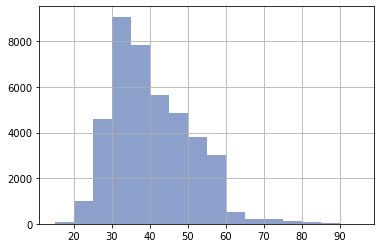

In [57]:
base_color = sns.color_palette('Set2')[2]

age_bins = np.arange(15, 100, 5)
plt.hist(data = data, x = 'age', bins = age_bins, color = base_color);
plt.grid();

In [58]:
data.query('20 < age <= 60').shape[0]/data.shape[0]

0.9745239945599379

> **97.5% of the clients fall in age range of 20 - 60 years old.**

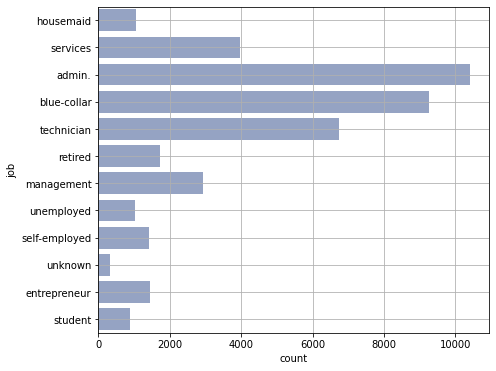

In [59]:
# Let's see distribution of clients as per job

plt.figure(figsize = (7,6))
sns.countplot(data = data, y = 'job', color = base_color);
plt.grid()

> Majority of the clients are employed in admin, blue-collar, technician and services job types.

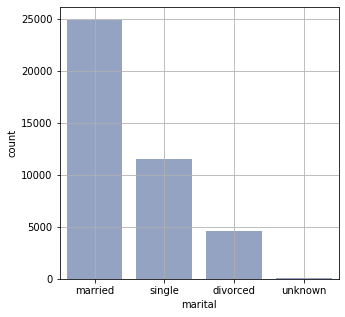

In [60]:
# Distribution as per marital status

plt.figure(figsize = (5,5))
sns.countplot(data = data, x = 'marital', color = base_color);
plt.grid()

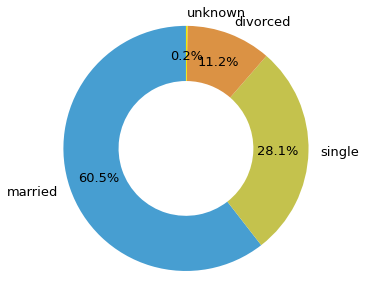

In [61]:
d_ratio = data['marital'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(d_ratio, labels = d_ratio.index, autopct='%1.1f%%', pctdistance=0.75, 
        colors = ['#479ed1', '#c4c24d', '#db9244', '#f0e807'], startangle = 90, 
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 13})
plt.axis('square');

> marital status of most of the customers is known.

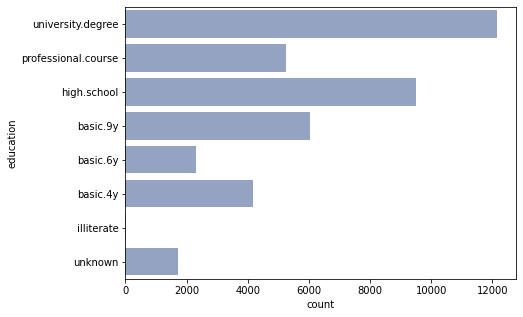

In [62]:
ed_order = ['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown']

plt.figure(figsize = (7,5))
sns.countplot(data = data, y = 'education', order = ed_order, color = base_color);

In [63]:
data.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

> Education - Majority of clients have completed university degree & high school, followed by basic 9y, professional course and basic.4y. For 1730 clients, education status is unknown.

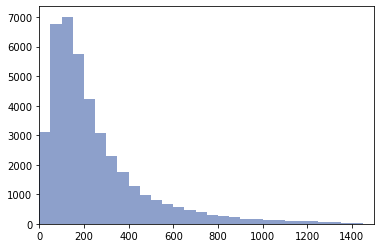

In [64]:
# Distribution of duration

d_bins = np.arange(0, 1500, 50)
plt.hist(data = data, x = 'duration', bins = d_bins, color = base_color);
plt.xlim(0,1500);

Distribution is heavily concentrated until 400 seconds. Let's change it into log scale to analyze better.

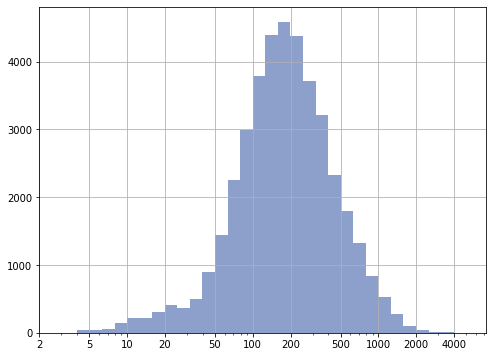

In [65]:
# Plot duration with log scale.

plt.figure(figsize = (8,6))

binsize = .1
x_bins = 10 ** np.arange(0.6, np.log10(data['duration'].max()) + binsize, binsize)

plt.hist(data = data, x = 'duration', bins = x_bins, color = base_color);
plt.xscale('log');
tick_locs = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000]
plt.xticks(tick_locs, tick_locs);
plt.grid();

> Majority of the call duration lies in range 50 to 800 secs. 

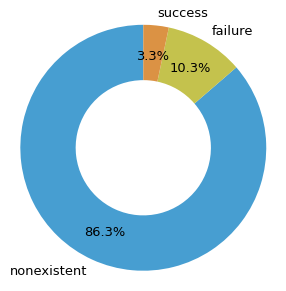

In [66]:
d_ratio = data['poutcome'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(d_ratio, labels = d_ratio.index, autopct='%1.1f%%', pctdistance=0.75, 
        colors = ['#479ed1', '#c4c24d', '#db9244'], startangle = 90, 
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 13})
plt.axis('square');

> Previous campaign outcome is known for 13.6% of the customers. 3.3% of previous outcomes were successful. It will be interesting to know how likely it is for an existing customer to agree to open a new term deposit. We will explore this in bivariate exploration.

Let's examine Employment Variation Rate (EVR) next.

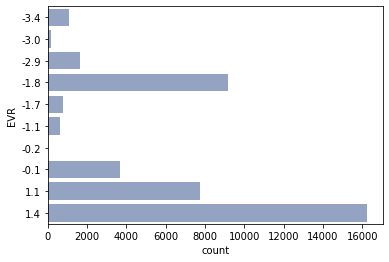

In [67]:
EVR_list = [x for x in data.EVR.unique()]

sns.countplot(data = data, y = 'EVR', order = EVR_list.sort(), color = base_color);

> The distribution for EVR seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the EVR was more than -0.2.

Let's check Consumer Price Index(CPI) next.

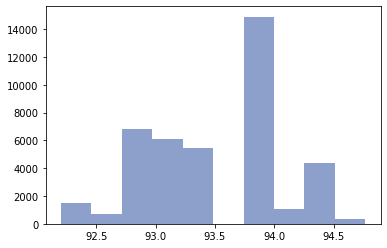

In [68]:
plt.hist(data = data, x = 'CPI', color = base_color);

> CPI distribution is also bimodal. 

Consumer Confidence Index (CCI) next.

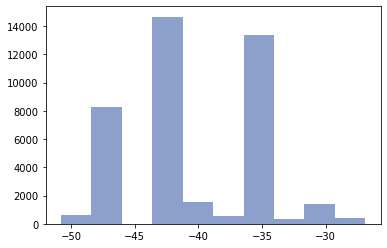

In [69]:
plt.hist(data = data, x = 'CCI', color = base_color);

> Consumer confidence index is always negative. We don't see much of noticeable trend here.

<a name = 'euribor-dist'>Let's see the distribution over Euribor 3 month rate next.</a>

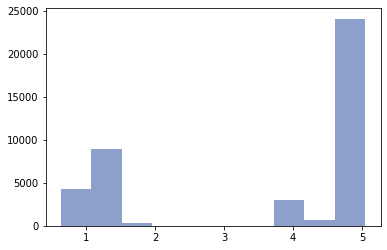

In [70]:
plt.hist(data = data, x = 'euribor', color = base_color);

> Distribution for Euribor 3 month rate is divided into two parts i.e. one below 2 and one above 3.5. Majority of the calls were made when euribor is above 3.5

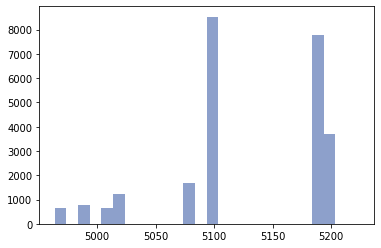

In [71]:
bins = np.arange(data['no_emp'].min(), data['no_emp'].max(), 10)
plt.hist(data = data, x = 'no_emp', bins = bins, color = base_color);

> Number of employees are recorded quarterly. That explains why the distribution is so discrete.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


> - __y__ - Out of the total calls that are made, 11.3 % of them are successful and result into client opening a term deposit.
- __age__ - Majority of the clients fall in age range of 25 - 60 years old.
- __job__ - Majority of the clients are employed in admin, blue-collar, technician and services job types.
- __education__ - Majority of clients have completed university degree & high school, followed by basic 9y, professional course and basic.4y. For 1730 clients, education status is unknown.
- __marital__ - Majority of people fall under single or 
- __duration__ - duration was heavily concentrated until 400s. Log scale has been used for better understanding of the trend. Majority of the call duration lies in range 50 to 800 secs.
- __poutcome__ - Previous campaign outcome is known for 13.6% of the customers. 3.3% of previous outcomes were - successful. It will be interesting to know how likely it is for an existing customer to agree to open a new deposit account.
- __EVR__ - The distribution for Employment Variation Rate seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the EVR was more than -0.2.
- __euribor__ - Distribution for Euribor 3 month rate is divided into two parts i.e. one below 2 and one above 3.5. Majority of the calls were made when euribor is above 3.5

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - We did not see any unusual distributions. 'duration' variable was heavily concentrated on values below 400s, but that is expected for campaign calls. 
- The result column 'y' is categorical variable with values of 'yes' and 'no'. I have added one more column 'y_n' to add a binary representation of the result. Binary values could be useful in our analysis to determine percentage of successful cases.

## Bivariate Exploration


Check any correlation in between numeric variables.

(6.5, -0.5)

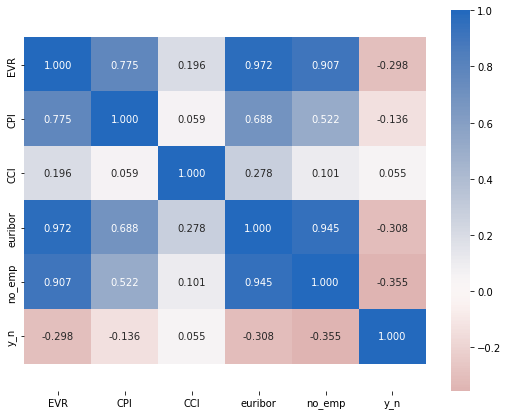

In [72]:
num_vars = ['EVR', 'CPI', 'CCI', 'euribor', 'no_emp', 'y_n']

# correlation plot
plt.figure(figsize = [9, 7])

ax = sns.heatmap(data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

> **Our variable of interest i.e. 'y_n' appears to have some correlation with EVR, euribor and no_emp. We will explore this further in multivariate exploration. There also seems to be very strong correlation in EVR, euribor and no_emp with each other.**

<a name = 'var-corr'> Let's visualize the relationship between EVR, euribor and no_emp to see the pattern.</a>

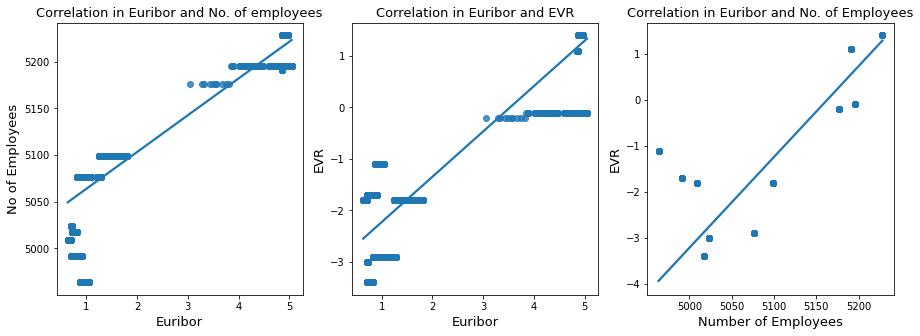

In [73]:
plt.figure(figsize = [15, 5])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor vs no_emp
plt.subplot(1, 3, 1)
sns.regplot(data = data, x = 'euribor', y = 'no_emp')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor vs EVR
plt.subplot(1, 3, 2)
sns.regplot(data = data, x = 'euribor', y = 'EVR')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: no_emp vs EVR
plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'no_emp', y = 'EVR')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of Employees', fontdict = font);

> **It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other.**
Also, when euribor is less than 2, EVR is always less than -1. Similarly, when euribor is more than 3, EVR is always more than 0.5.

Let's go through some category variables to check if there is any trend in proportion of client that say 'yes'.

In [74]:
# Define function to display a plot to show the proportion of clients who say 'yes' for a given category.

def proportion_plot(x):
    parm_counts = data.groupby([x, 'y']).size()
    parm_totals = data.groupby(x).size()
    proportions = parm_counts[:, 'yes']/parm_totals

# Draw bar graph
    plt.style.use('default')
    ind = np.arange(proportions.count())  # the x locations for the groups

# plot bars
    bars_0 = plt.bar(ind, proportions.sort_values(ascending = False), alpha=.7, color = base_color)

# title and labels
    plt.title('Campaign Success Proportion by {}'.format(x))
    labels = [l for l in proportions.sort_values(ascending = False).index]  # xtick labels
    plt.xticks(ind, labels, rotation = 30)

    plt.xlabel(x, fontdict = {'fontsize':'13'})
    plt.ylabel('Proportion', fontdict = {'fontsize':'13'})
    plt.grid()
    plt.show()

<a name = 'job-prop'> Proportion by 'job' who say yes </a>

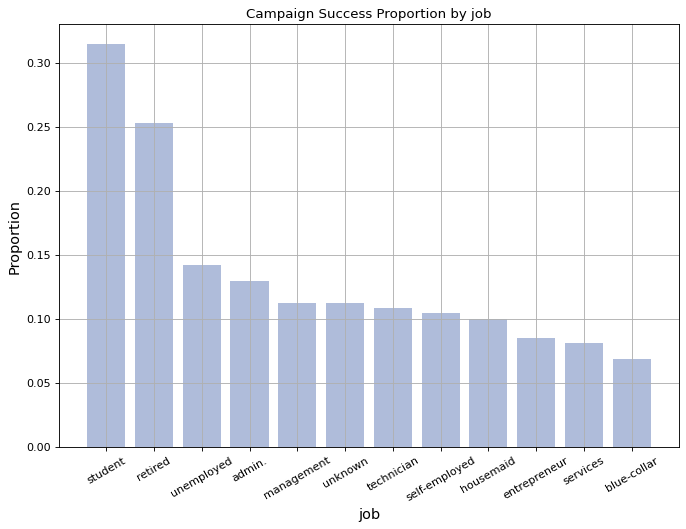

In [75]:
# Proportion by 'job' who say yes

plt.figure(figsize=(10,7), dpi=80)
proportion_plot('job')

> Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank.

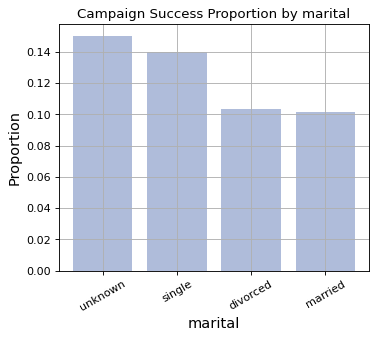

In [76]:
# Proportion by 'marital' status who say yes

plt.figure(figsize=(5,4), dpi=80)
proportion_plot('marital')

> Singles open more accounts when compared to divorced or married clients.

<a name = 'p-poutcome'> Success proportion as per Previous outcome </a>

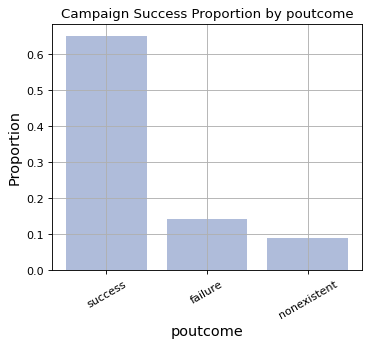

In [77]:
# Proportion by 'poutcome' who say yes

plt.figure(figsize=(5,4), dpi=80)
proportion_plot('poutcome')

> **65% of the people who agreed for previous campaign agreed for this campaign as well. That is a very significant number and certainly could be used by sales team to select target customers.**

<a name = 'age-trend-all'>Are there any trends in the proportion of client's who open term deposit by age.</a>

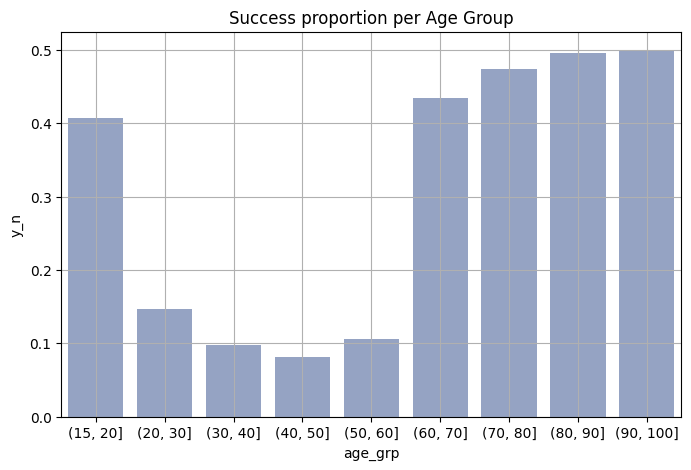

In [78]:
# Let's create age bins

age_bins = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data['age_grp'] = pd.cut(data['age'], bins = age_bins)
plt.figure(figsize = (8,5))
sns.barplot(data = data, x = 'age_grp', y = 'y_n', ci = None, color = base_color);
plt.title('Success proportion per Age Group')
plt.grid()

> __This is an interesting trend. Although [97.5% of clients fall in age range of 20-60](#age-distribution), they are the ones who are least likely to open the account. Success rate for the calls is more for clients upto 20 and above 60 years of age.__

Check for trends as per number of campaign calls.

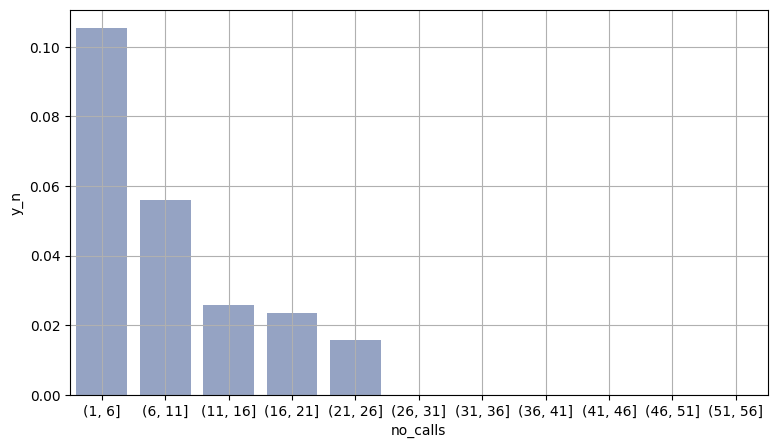

In [79]:
# Let's create campaign bins

campaign_bins = [i for i in range(1, 57, 5)]

data['no_calls'] = pd.cut(data['campaign'], bins = campaign_bins)
plt.figure(figsize = (9,5))
sns.barplot(data = data, x = 'no_calls', y = 'y_n', color = base_color, ci = None);
plt.grid()

> **The probability of customer opening the account reduces far greatly as the number of calls increase. Infact, probability is almost zero after 26 calls. Probability after 11 calls is less than 3%.**

Next, let's narrow down our chart until 17 campaign calls.

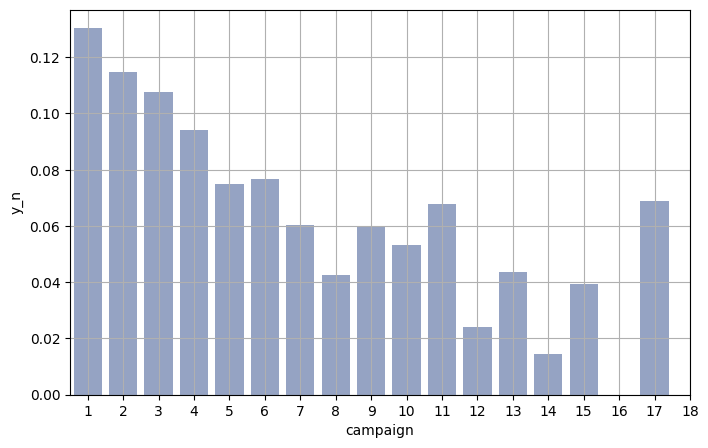

In [80]:
plt.figure(figsize = (8,5))
sns.barplot(data = data, x = 'campaign', y = 'y_n', color = base_color, ci = None);
plt.xlim(-0.5, 17)
plt.grid()

> **Most number of customers say yes to opening the account in very first call. As the number of calls increase, the probability decreases for the customer agreeing to opening the account.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  - Our variable of interest i.e. 'y_n' appears to have some correlation with EVR, euribor and no_emp.
 - Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank.
 - Singles open more accounts when compared to divorced or married clients.
 - 65% of the people who agreed for previous campaign agreed for this campaign as well. That is a very significant number and certainly could be used by sales team to select target customers.
 - Although most number of clients fall in age range of 25-60, they are the ones who are least likely to open the account. Success rate for the calls is more for clients above 60 years of age.
 - Most number of customers say yes to opening the account in very first call. As the number of calls increase, the probability decreases for the customer agreeing to opening the account. Infact, probability is almost zero after 26 calls. Probability after 11 calls is less than 3%.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There appears to be a [very strong positive correlaton in between EVR, euribor and no_emp](#var-corr). With increase in euribor rates, employment variation rate and number of employees increase as well. 

## Multivariate Exploration


Let's take a random sample of 500 records to observe any patterns through scatterplots.

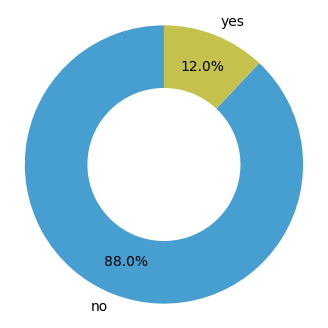

In [81]:
samples = np.random.choice(data.shape[0], 500, replace = False)
df = data.loc[samples,:]
ratio = df.y.value_counts()

plt.figure(figsize = (4,4))
plt.pie(ratio, labels = ratio.index, autopct='%1.1f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 10})
plt.axis('square');

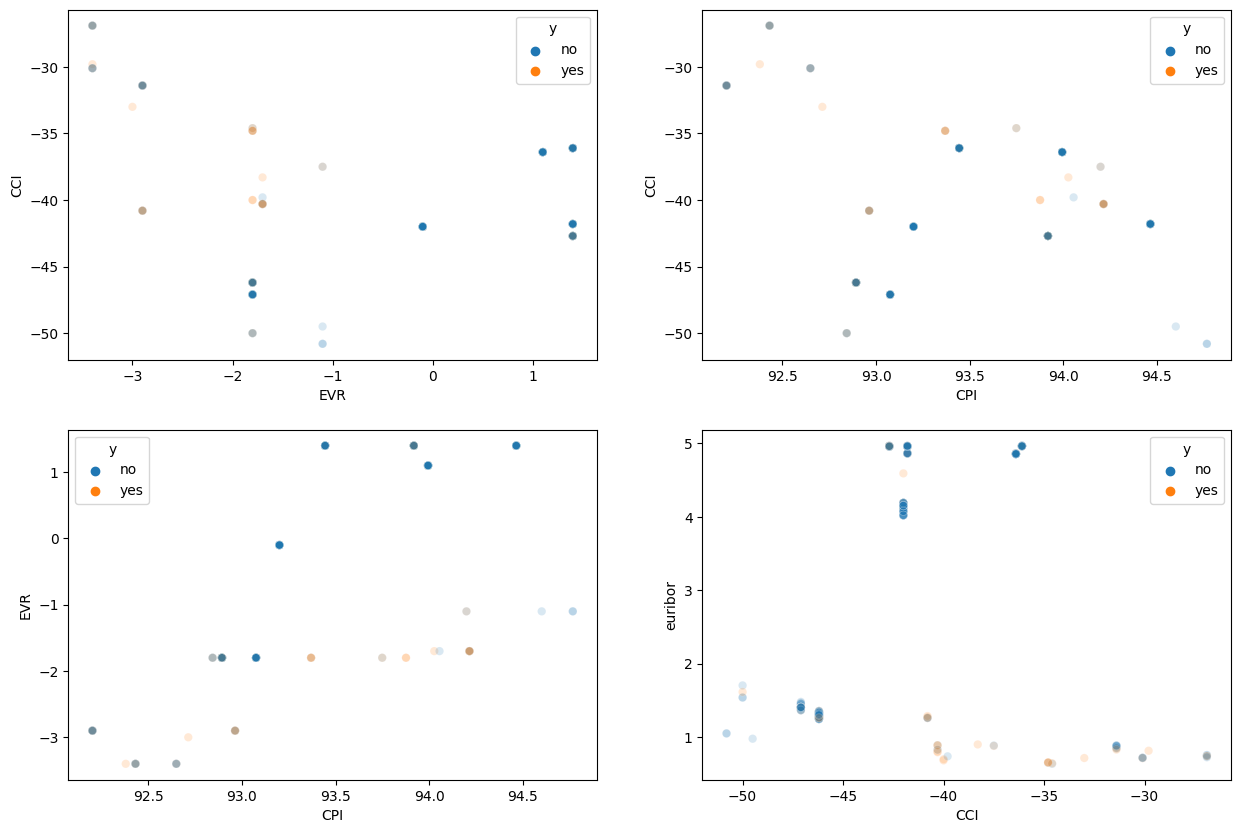

In [82]:
plt.figure(figsize = [15, 10])

# 1st plot: EVR vs CCI
plt.subplot(2, 2, 1)
sns.scatterplot(data = df, x = 'EVR', y = 'CCI', hue = 'y', alpha = 1/6);

# 2nd plot: CPI vs CCI
plt.subplot(2, 2, 2)
sns.scatterplot(data = df, x = 'CPI', y = 'CCI', hue = 'y', alpha = 1/6);

# 3rd plot: CPI vs EVR
plt.subplot(2, 2, 3)
sns.scatterplot(data = df, x = 'CPI', y = 'EVR', hue = 'y', alpha = 1/6);

# 4th plot: CCI vs euribor
plt.subplot(2, 2, 4)
sns.scatterplot(data = df, x = 'CCI', y = 'euribor', hue = 'y', alpha = 1/6);

> - 1st plot - 'EVR' and 'CCI' don't seem to be correlated. But it does seem like there are more 'yes' dots when EVR is less than -1.
- 2nd plot - The points are plotted on top of each other and hence we cannot see any generic trend in the data. 'CPI' and 'CCI' don't seem to have a direct impact on 'y'.
- 3rd plot - CPI and EVR don't look correlated. Moreover, 'CPI' doesn't seem to have any impact on 'y' outcome. There does seem to be a fairly large concentration of 'yes' when 'EVR' is less than -1.
- 4th plot - It looks like there is a pattern when euribor is less than 2. 'CCI' doesn't have any impact on 'y' outcome.

We know that euribor and EVR are postively correlated and [when 'euribor' is less than 2, 'EVR' is always less than -1](#euribor-evr).

Let's explore this more where we will only select the records where euribor is less than 2.

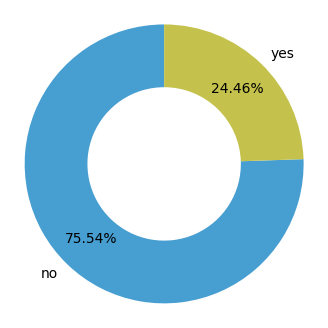

In [83]:
# selecting records from the whole dataset based on the criteria

df_sub = data.query('euribor < 2')

ratio = df_sub.y.value_counts()

plt.figure(figsize = (4,4))
plt.pie(ratio, labels = ratio.index, autopct='%1.2f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 10})
plt.axis('square');

> **When EVR < -1 and euribor < 2, 24.46% of people agree to opening term deposit. That's a very large ratio and can certainly help to approach customers.**

We had also noticed earlier that [lesser number of calls are placed when euribor < 2](#euribor-dist). Let's get a more clear picture on this.

In [84]:
# number of records where euribor is less than 2

data.query('euribor < 2').shape[0]

13494

In [85]:
# number of records where euribor is equal to or more than 2

data.query('euribor >= 2').shape[0]

27682

> **Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.**

Let's check the age distribution in this data subset where euribor < 2.

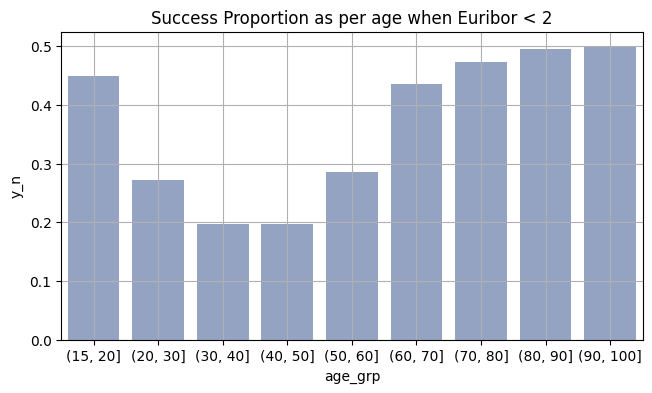

In [86]:
plt.figure(figsize = (7.5,4))

sns.barplot(data = df_sub, x = 'age_grp', y = 'y_n', ci = None, color = base_color);
plt.title('Success Proportion as per age when Euribor < 2')
plt.grid()

> **When we compare this trend with [overall data trend](#age-trend-all), there are some considerable changes. We see that clients upto 60 years of age, open considerably higher percentage of term deposits when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.**

Let's statistically check the pattern for clients upto age 60 in overall and subset data.

In [87]:
# average success rate when age is upto 60 years in overall data.

data.query('age <= 60')['y_n'].mean()

0.10492462810738322

In [88]:
# average success rate when age is upto 60 years in subset data(euribor < 2).

df_sub.query('age <= 60')['y_n'].mean()

0.2293023994914985

<a name = 'above_60'> Average success rate when age is upto 60 years in overall data. </a>

In [89]:
# average success rate when age is upto 60 years in overall data.

data.query('age > 60')['y_n'].mean()

0.45544554455445546

> **22.93% of young people(upto age 60) open term deposit when euribor < 2. This is more than the average of 10.49% over the whole dataset.**

Let's also explore the success ratio with regard to client's education and job profile. We will use heat map for the purpose.

(12.5, -0.5)

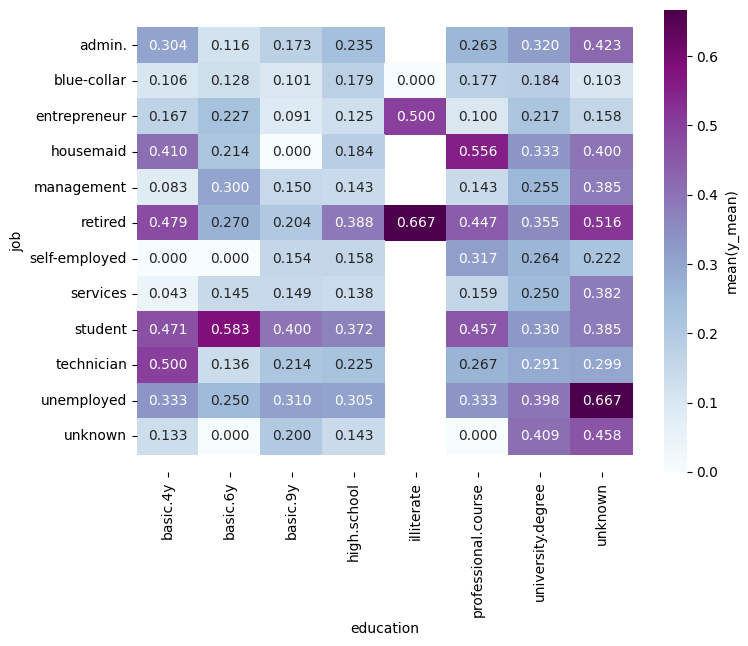

In [90]:
cat_means = df_sub.groupby(['job', 'education']).mean()['y_n']
cat_means = cat_means.reset_index(name = 'y_mean')
cat_means = cat_means.pivot(index = 'job', columns = 'education',
                            values = 'y_mean')

plt.figure(figsize = (8,6))
ax = sns.heatmap(cat_means, annot = True, fmt = '.3f', cmap = 'BuPu',
           cbar_kws = {'label' : 'mean(y_mean)'})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

> Generally looking at the heatmap, we see that students, technician, retired and unemployed clients are more likely to open term deposit. Also clients who have studied at university, prodessional course and basic 4y. Clients with unknown educational background are most likely to open term deposit.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - We noticed that when euribor 3 month rate is less than 2, success rate of the campaign increases to 24.46%. This is significant increase from 11.3% success rate in overall data.
- Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.
- Statistically, 22.93% of young people(upto age 60) open term deposits when euribor < 2. This is more than the average of 10.49% over the whole dataset for the same age group. Therefore, we can conclude that clients upto 60 years of age open considerably higher percentage of accounts when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.

<br>

### Were there any interesting or surprising interactions between features?

> Surprisingly, clients with unknown educational background are most likely to open term deposit.

<br>

### Recommendations for Improvement
> - We observed that when euribor 3 month rate is less than 2, clients under the age of 60 are twice more likely to open a term deposit. We should noticed that bank called only half the number of customers when euribor was less than 2 as compared to otherwise. So, we should target to call more customers during this period for better success rate. 
- In overall data, [students and retirees](#job-prop) are much more likely to open term deposit. [45%](#above_60) of clients above 60 years of age agreed to open term deposit. But we have only [2.5%](#age-distribution) of customers in this range. It is recommended to include more of students, retirees and clients older than 60 years of age to get a better success rate in overall dataset.
- Clients for whom previous campaign outcome was successful, agreed to [65%](#p-poutcome) of the calls. This is significant figure and can be used to target customers in further campaigns.

